# Brain Image Library

Name: Natalie Pham

Andrew ID: thanhngp

* You can work in groups, it is highly encouraged. Basic divide-and-conquer.
* But each of you will have to submit your notebook and data on Canvas.

You have been given access to a database where you can pull information from one table. The purpose of this exercise is to

* clean the local copy of the table
* compute some basic information about the files in the table
* add these features to the table
* use the original raw data to create a second table
* use these 2 tables to make some pretty plots

In theory, the file and dataset level features you will be computing in this exercise will be stored in a database and used for a dashboard.

## Exercise 1
a. The variable `file` belows points to a CSV file with the file informations. Load the table into the workspace using Pandas or Dask.

**Hint**
If you use Pandas, set `low_memory` to `False`. For more info click [here](https://stackoverflow.com/questions/58551446/how-to-set-low-memory-to-false).

In [2]:
from google.colab import drive
drive.mount('/content/drive/') #My Drive/38610/Project')
%cd drive/My Drive/38610/Project/

Mounted at /content/drive/
/content/drive/My Drive/38610/Project


In [ ]:
!pip install tqdm
!pip install pathlib
!pip install warnings

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [3]:
# import libraries
import numpy as np
import pandas as pd
import time
from pathlib import Path
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# INSERT CODE HERE
file = 'final_project_dataset.csv' # '/bil/workshops/2022/data-science/final_project_dataset.csv'
def load_data( file ):
    t1 = time.time()
    df = pd.read_csv(file, low_memory=False, sep=',' ) # add nrows to select number of rows to build dataframe
    t2 = time.time()
    total = t2-t1
    print(total)
    return df

df = load_data(file)

In [ ]:
print(df.shape)
df.head()

b. Print the column names.

In [ ]:
# INSERT CODE HERE
df.keys()

c. This dataframe has one line per file in the file system. The data wrangler already included some file level statistics in the table. However before we can proceed adding more columns, we need to fix some things.

For example, if you take a look at the file creation dates, these look like

```
df['file_creation_date'][0]
'2019-12-0503:26:25'
```

when in fact these should look like 

```
'2019-12-05 03:26:25'
```

First change the values in the column `file_creation_date` so the dates are correct.

Second, change the data type of this series to be a `datetime` object.

**Hint**
* Add a whitespace.

In [ ]:
# INSERT CODE HERE
def time_formatting(datetime):
    # datetime(str): 2019-12-0503:26:25
    
    # Output:
    # new_datetime: fixed format for date/time with proper spacing (2019-12-05 03:26:25)
    
    datetime = str(datetime)
    new_datetime = datetime[0:10] + ' ' + datetime[10:]
    return new_datetime

start = time.time()

print('Computing file_creation_date...')

temp_file = 'manifest.tsv'

if Path(temp_file).exists()==True:
    df = pd.read_csv( temp_file, sep='\t', low_memory=False )
else:
    df['file_creation_date'] = df.apply(lambda d: time_formatting(d.file_creation_date), axis=1)
    df['file_creation_date'] = pd.to_datetime(df['file_creation_date'],errors='coerce')

end = time.time()
print('Time taken: ', end-start)

In [ ]:
print(df['file_creation_date'].dtypes)

d. The column `file_size` has the file size in bytes. Add a column named `human_readable_file_size` that is dtype string. This string representation of the file size should be an approximation to the nearest unit with one decimal point. For example, `15M`, `1.7G` and `5.6T`.

In [ ]:
# INSERT CODE HERE
# add a new column 'human_readable_file_size'
df['human_readable_file_size'] = ''

def file_size_conversion(size):
    # Input: 
    # size (int): file size in bytes
    
    # Output:
    # r_size (str): approximate human readable file size (KB, MB, GB, TB)
    
    if np.isnan(size) == True or size < 0:
        r_size = ''
    elif size < 10**2: # 0 - 99 bytes
        r_size = str(round(size,1)) + 'B'
    elif size >= 10**2 and size < 10**5: # 100 - 99,999 bytes
        r_size = str(round(size/(10**3), 1)) + 'K'
    elif size >= 10**5 and size < 10**8: # 100,000 - 99,999,999 bytes
        r_size = str(round(size/(10**6), 1)) + 'M'
    elif size >= 10**8 and size < 10**11: # 100,000,000 - 99,999,999,999 bytes
        r_size = str(round(size/(10**9), 1)) + 'G'
    else: # above 100,000,000,000 bytes
        r_size = str(round(size/(10**12), 1)) + 'T'
    
    return(r_size)

start = time.time()

print('Computing human_readable_file_size...')

temp_file = 'manifest.tsv'

if Path(temp_file).exists()==True:
    df = pd.read_csv( temp_file, sep='\t', low_memory=False )
else:
    df['human_readable_file_size'] = df.apply(lambda s: file_size_conversion(s.file_size), axis=1)

end = time.time()
print('Time taken: ', end-start)

In [ ]:
df.head(20)

e. The column `xxh128` is empty. To compute this hash and populate this column we will use the function below. However, due to time constraints, we will only compute these hash for files whose extensions are not `.tif`/`.tiff`.

For each file in the table, whose extension is not `.tif`/`.tiff`, compute the hash and store it in the column `xxh128`. Files without this hash, should remain as `None`.

In [ ]:
#INSERT CODE HERE
import subprocess

def compute_xxh128sum( filename ):
    if Path(str(filename)).is_file():
        # print(filename)
        results = subprocess.check_output('/bil/packages/xxhash/0.8.0/xxh128sum ' + str(filename) + ' | cut -d" " -f1 | xargs', shell=True,stderr=subprocess.DEVNULL)
        return results.decode("utf-8").strip

temp_file = 'manifest.tsv'

if Path(temp_file).exists()==True:
    df = pd.read_csv( temp_file, sep='\t', low_memory=False )
    
start = time.time()

print('Computing xxh128...')

df1 = df.loc[(df['file_extension'].str.contains('.tif')!=True)]
xxh128 = df1.loc[(df['xxh128'] == 'None')]
print(xxh128.shape)
# Originally the column 'xxh128' has 1109984 values are None and their file extension are not '.tif'
# I have able to compute ~ 9000 new values for 'xxh128' 

counter = 0
if df2.shape[0] > 0:
    for i in tqdm(xxh128.index): 
        # compute hash and store to 'xxh128' if file extension is not '.tif' or '.tiff'
        df['xxh128'][i] = compute_xxh128sum(df['filepath'][i])

        # checkpoint to save df to a temporary tsv file
        if counter % 1000 == 0 or i == len(xxh128.index)-1:
            #print('checkpoint at ', i)
            df['xxh128'].to_csv('temp1e.tsv', sep="\t",index=False)
            counter = counter + 1

end = time.time()
print('Time taken: ', end-start)

In [ ]:
print(df['xxh128'].value_counts())

f. Add column `exists`. Use the value in `filepath` to find if the file exists on disk. If the file exists, then populate the column as `True`. `False` otherwise.

**Hint** 
* Use `Path` from `pathlib`.
* All files should exist, if some of these don't, then report it. Not your fault.

In [ ]:
#INSERT CODE HERE
from pathlib import Path

def check_filepath(filepath):
    try:
        exist = Path(str(filepath)).exists()
        return(exist)
    except PermissionError:
        exist = False
        return(exist)

start = time.time()

temp_file = 'manifest.tsv'

print('Computing file_exists...')

if Path(temp_file).exists():
    df = pd.read_csv( temp_file, sep='\t', low_memory=False )
else:
    # add column 'exist'
    df['exists'] = None

for i in tqdm(df.index):
    # if np.isnan(df['exists'][i]) == True:
    if df['exists'][i] == None:
        df['exists'][i] = check_filepath(df['filepath'][i])
    
    # checkpoint to save df to a temporary tsv file
    if i % 5000 == 0 or i == len(df.index)-1:
        # print('checkpoint at ', i)
        df.to_csv('temp1f.tsv', sep="\t",index=False)

end = time.time()
print('Time taken: ', end-start)

In [ ]:
# output the number of files exist on disk vs. non-exist
df['exists'].value_counts()

g. Add columns `download_link`, `download_ready`, `response_code`, `download_timestamp`. Add these four columns and set the default values to `None`.

In [ ]:
#INSERT CODE HERE
df['download_link'] = None
df['download_ready'] = None
df['response_code'] = None
df['download_timestamp'] = None

h. We can populate the columns above at the same time to minimize the number of requests. In this case, each value in `filepath` can be turned into an download link. For example, the file `/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19032506-191184/readme.txt` can be turned into a URL by replacing the prefix `/bil/data` with `https://download.brainimagelibrary.org`, leading to `https://download.brainimagelibrary.org/00/9c/009c1e6fcc03ebac/mouseID_19032506-191184/readme.txt`.

Download the response header (not the file) to determine if the file is reachable. Add `True` to `download_ready` if the file is reachable. `False` otherwise.

Save the response code from the request to column `response_code` as an integer, e.g. 202, 404, etc.

Record the timestamp when you made this request to column `download_timestamp`. This column should be of dtype `datetime`.

**Hints**
* Write a single method that can perform these tasks in a single call.
* You could also write a method that takes the full dataframe and returns and updated dataframe.
* You should be saving checkpoints to avoid recomputation.
* All links should be reachable. If some of these aren't that's a problem, but not your problem.



In [ ]:
#INSERT CODE HERE
import requests
import datetime

def check_download(filepath):
    path = str(filepath)[9:]
    # print(path)
    url = 'https://download.brainimagelibrary.org' + path
    response = requests.head(url)
    request_time = str(datetime.datetime.now())
    code = response.status_code
    if code == 200 or code == 308:
        download_ready = True
    else:
        download_ready = False
    
    return(url, download_ready, code, request_time)

start = time.time()

temp_file = 'manifest.tsv'

print('Computing download_ready...')
if Path(temp_file).exists():
    df = pd.read_csv( temp_file, sep='\t', low_memory=False )

for i in tqdm(df.index):    
    # get download link and check if link is ready for download
    if str(df['response_code'][i]) == 'nan':
        url, download_ready, code, request_time = check_download(df['filepath'][i])
        df['download_link'][i] = url
        df['download_ready'][i] = download_ready
        df['response_code'][i] = code
        df['download_timestamp'][i] = request_time
    
    # checkpoint to save df to a temporary tsv file
    if i % 10000 == 0 or i == len(df.index)-1:
        # print('checkpoint at ', i)
        df[['download_link','download_ready','response_code','download_timestamp']].to_csv('temp1h.tsv', sep="\t",index=False)

df['download_timestamp'] = pd.to_datetime(df['download_timestamp'],errors='coerce')
end = time.time()
print('Time taken: ', end-start)

In [ ]:
df['response_code'].value_counts()

i. Populate the column `dataset_uuid`. This one is tricky. This dataframe has one row per file. These files are grouped together in datasets. However the column `dataset_uuid` is empty. And now we need to populate it.

A dataset can be identified as a combination of `collection_id`, `sample_id` and `directory`. Generate a unique [UUID](https://www.educba.com/python-uuid/) for each unique combination of `collection_id`, `sample_id` and `directory`. Use the UUID to populate the column `dataset_uuid`. Keep in mind there will be multiple rows in this table that will share the combination of `collection_id`, `sample_id` and `directory`, hence all of these rows should also have the `dataset_uuid` as it means these are all part of the same dataset.

In [ ]:
import uuid

print('Compute uuid...')

temp_file = 'manifest.tsv'

if Path(temp_file).exists():
    df = pd.read_csv( temp_file, sep='\t', low_memory=False )
else:
    df['dataset_uuid'] = df.groupby(['collection_id', 'sample_id', 'directory']).dataset_uuid.transform(lambda f: uuid.uuid4())

In [ ]:
temp_file = 'manifest.tsv'

if Path(temp_file).exists():
    df = pd.read_csv( temp_file, sep='\t', low_memory=False )

k. If you haven't done it (and you should have saved some checkpoints), then save the df to disk as a pickle file and as a tsv file. Save it to `manifest.tsv` and `manifest.pkl`.

In [ ]:
print(df.shape)
df.head()

In [ ]:
#INSERT CODE HERE
# save to .tsv file
df.to_csv('manifest.tsv', sep="\t",index=False)

# save to .pkl file
import pickle
with open('manifest.pkl', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Exercise 2
a. Create another dataframe with columns `['dataset_uuid', 'collection_id', 'dataset_id', 'sample_id', 'directory', 'file_extensions','timestamp']`.

i. Set `file_extensions` to `None`.

ii. Use the values in the first dataframe to populate the other columns.

iii. Record the timestamp when you made this request to column `timestamp`. This column should be of dtype `datetime`.

**Hints**
* The first dataframe had a row per each file in the dataset. Whereas the second dataframe should have one row per dataset.

In [ ]:
#INSERT CODE HERE
import datetime

df2 = df[['dataset_uuid', 'collection_id', 'dataset_id', 'sample_id', 'directory']]
df2['file_extensions'] = None
df2['timestamp'] = datetime.datetime.now()

df2.drop_duplicates(subset=['dataset_uuid'], inplace=True)
print(df2.shape)

df2.head()

b. For each dataset in the first dataframe, count the number of file extensions.

i. Store these values as JSON in the column `file_extensions`. For example, if a dataset has 100 `.tif`s and 1000 `.jpeg`s, then you should store the string `{'tif':100,'jpeg':1000 }`.

ii. If a dataset has a file extension that is `None` or `Nan` store it as `other`. For example, `{'tif':100,'jpeg':1000, 'other':4 }`.

In [ ]:
#INSERT CODE HERE

def check_null(s):
    if str(s) == 'nan' or s==None:
        return True
    else:
        return False

temp_file = 'datasets.tsv'

if Path(temp_file).exists():                         
    df2 = pd.read_csv(temp_file, sep='\t', low_memory=False)
else:
    # if temp_file does not exist, populate df2['file_extensions']
    exts = []
    for i in tqdm(df['dataset_uuid'].unique()):
        #print(i)
        df_temp = df[df['dataset_uuid']==i]
        df_temp['file_extension'] = df_temp['file_extension'].apply(lambda f: 'other' if check_null(f) else f)
        extensions = str(df_temp['file_extension'].value_counts().to_json())
        #print(extensions)
        exts.append(extensions)
    df2['file_extensions'] = exts

In [ ]:
print(df2.shape)
df2.head()

c. Save the dataframe to disk as a pickle file and as a tsv file. Save it to `datasets.tsv` and `datasets.pkl`.

In [ ]:
#INSERT CODE HERE
# save to .tsv file
df2.to_csv('datasets.tsv', sep="\t",index=False)

# save to .pkl file
import pickle
with open('datasets.pkl', 'wb') as handle:
    pickle.dump(df2, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Exercise 3
a. Create another dataframe with columns `['timestamp', 'number_of_datasets', 'number_of_collections', 'number_of_files', 'file_extensions']`.

i. Timestamp records the current date, not the time, e.g. 2022-01-23.

ii. The number of datasets in the `datasets` dataframe goes in `number_of_datasets`.

iii. The number of unique collections in the `datasets` dataframe goes in `number_of_collections`.

iv. The total number of files in the `manifest` dataframe goes in `number_of_files`.

v. Another tricky one. Aggregate all the file extensions in column `file_extensions` in dataframe `datasets`, collect these as a single JSON block and it to `file_extensions` in this dataframe.

In [8]:
import datetime

In [10]:
def check_null(s):
    if str(s) == 'nan' or s==None:
        return True
    else:
        return False

In [6]:
temp_file = 'manifest.tsv'

if Path(temp_file).exists():
    df = pd.read_csv( temp_file, sep='\t', low_memory=False )

temp_file = 'datasets.tsv'

if Path(temp_file).exists():
    df2 = pd.read_csv( temp_file, sep='\t', low_memory=False )

In [14]:
#INSERT CODE HERE

temp_file = 'info.tsv'

if Path(temp_file).exists():                         
  df3 = pd.read_csv(temp_file, sep='\t', low_memory=False)
else:
  # Get timestamp
  tsp = str(datetime.datetime.now())[0:10]
  print(tsp)

  # Get number of datasets
  nDatasets = df2['dataset_uuid'].nunique()
  print(nDatasets)

  # Get number of collections
  nCollections = df['collection_id'].nunique()
  print(nCollections)

  # Get number of files
  nFiles = df['filepath'].nunique()
  print(nFiles)

  # Get all file_extensions
  df['file_extension'] = df['file_extension'].apply(lambda f: 'other' if check_null(f) else f)
  Exts = str(df['file_extension'].value_counts().to_json())
  print(Exts)

  # assign values to lists.  
  data = [{'timestamp':tsp, 'number_of_datasets':nDatasets, 'number_of_collections':nCollections, 'number_of_files':nFiles, 'file_extensions':Exts}]  
  
  # create DataFrame.  
  df3 = pd.DataFrame(data)  

  # convert type of 'timestamp' to type datetime
  df3['timestamp'] = pd.to_datetime(df3['timestamp'],errors='coerce')

In [15]:
print(df3.shape)
df3.head()

(1, 5)


,timestamp,number_of_datasets,number_of_collections,number_of_files,file_extensions
0,2022-10-23,3352,761,2825295,"{"".tif"":1327631,"".ktx"":658657,"".jp2"":432628,""...."


b. Save the dataframe to disk as a pickle file and as a tsv file. Save it to `info.tsv` and `info.pkl`.

In [13]:
#INSERT CODE HERE
# save to .tsv file
df3.to_csv('info.tsv', sep="\t",index=False)

# save to .pkl file
import pickle
with open('info.pkl', 'wb') as handle:
    pickle.dump(df3, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Exercise 4
Create some pretty plots and embed them in this notebook. Feel free to use any plotting library in Python. Make them pretty though. 

a. Waffleplot. Create a waffleplot from the column `file_extensions` in the dataframe `info`. 

* Title should be the date in `timestamp`.
* No axis labels.
* Add legend.

**Hints***
* Use `pywaffle`.

In [ ]:
!pip install pywaffle

In [4]:
temp_file = 'info.tsv'

if Path(temp_file).exists():                         
  df3 = pd.read_csv(temp_file, sep='\t', low_memory=False)

In [5]:
# load json library
import json

string = df3['file_extensions'][0]

# convert string to  object
d = json.loads(string)

# convert json to dataframe
Extension = pd.DataFrame.from_dict(d, orient='index', columns=['count']).reset_index() # pd.read_json(json_obj, orient ='index')
Extension.rename(columns={"index": "file_extension"},inplace=True)
Extension['reduce'] = round(Extension['count']/1000)
print(Extension)


     file_extension    count   reduce
0              .tif  1327631  13276.0
1              .ktx   658657   6587.0
2              .jp2   432628   4326.0
3              .swc   270720   2707.0
4              .ims    65107    651.0
5       .microscope    22030    220.0
6      .acquisition    22030    220.0
7              .txt    16672    167.0
8              .raw     3237     32.0
9             other     1656     17.0
10             .xml     1555     16.0
11             .bat      942      9.0
12          .marker      736      7.0
13             .SWC      679      7.0
14             .png      464      5.0
15            .json      176      2.0
16             .jpg      156      2.0
17              .db      147      1.0
18             .csv      139      1.0
19             .nd2       77      1.0
20             .dat       71      1.0
21          .master       47      0.0
22             .nii       47      0.0
23        .finished       46      0.0
24             .bin       28      0.0
25          

In [ ]:
#INSERT CODE HERE
import matplotlib.pyplot as plt
from pywaffle import Waffle

# Plot the waffle Chart
fig = plt.figure(
    figsize = (20, 20),
    FigureClass = Waffle,
    rows = 200,
    values = list(Extension['count']),
    labels = list(Extension['file_extension']),
    title = {
        'label': df3['timestamp'][0],
        'loc': 'center',
        'fontdict': {
            'fontsize': 20
        }
    },
    cmap_name='tab20b',
    legend={
        'loc': 'upper left',
        'bbox_to_anchor': (1, 1),
        'ncol': 3,
        'framealpha': 0,
        'fontsize': 10
    }
)

fig.show()

# waffle plot crashed on Google colab since it does not have enough RAM 

b. Histogram. Make a histogram using the column `download_ready` from the dataframe `manifest`. 

* Set title to `Broken links`
* Values set to `False` should be labeled as `Broken`.
* Values set to `True` should be labeled as `Not Broken`.
* No legend.
* Set y-label to `Number of links`

In [ ]:
temp_file = 'manifest.tsv'

if Path(temp_file).exists():                         
    df = pd.read_csv(temp_file, sep='\t', low_memory=False)

df.head()

,dataset_uuid,collection_id,dataset_id,sample_id,directory,filepath,filename,file_extension,file_size,file_creation_date,sha256,md5,xxh128,human_readable_file_size,exists,download_link,download_ready,response_code,download_timestamp
0,e028b411-8496-4edd-9e6d-c0d17dd67cc8,009c1e6fcc03ebac,UNKNOWN,190895,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,190895-metainfo.txt,.txt,693.0,2019-12-05 03:26:25,2f83f9da49a4fc59b80b9185207055832653ddf51117e3...,aae6752c964e56146934fef4e2e21491,<built-in method strip of str object at 0x7efe...,0.7K,True,https://download.brainimagelibrary.org/00/9c/0...,True,200.0,2022-10-17 15:58:36.460921
1,e028b411-8496-4edd-9e6d-c0d17dd67cc8,009c1e6fcc03ebac,UNKNOWN,190895,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,190895.json,.json,534.0,2019-12-05 03:27:38,55b2e61954ae32118f7d923a710489b0355123142579b9...,2704360b304105e180fb08ef06d1a52b,<built-in method strip of str object at 0x7efe...,0.5K,True,https://download.brainimagelibrary.org/00/9c/0...,True,200.0,2022-10-17 15:58:36.502495
2,e028b411-8496-4edd-9e6d-c0d17dd67cc8,009c1e6fcc03ebac,UNKNOWN,190895,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,xxhash_dat_mouseID_19022522-190895,NaN,1071128.0,2019-12-04 08:54:50,906545fa0dead8e6a5496ba803e9acd2a2d439b66db691...,fa2aaf565457ed5d5701d22d59f54506,<built-in method strip of str object at 0x7efe...,1.1M,True,https://download.brainimagelibrary.org/00/9c/0...,True,200.0,2022-10-17 15:58:36.537055
3,e2f4dbbd-37ab-4960-8a1b-be56e494502b,009c1e6fcc03ebac,UNKNOWN,191178,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19032...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19032...,xxhash_dat_mouseID_19032517-191178,NaN,1096722.0,2020-06-29 07:43:20,c4e07196782566e7773f69b1eba310492c2bd5355a273f...,18758836aa7a3697dfcbc10ffc76dba2,<built-in method strip of str object at 0x7efc...,1.1M,True,https://download.brainimagelibrary.org/00/9c/0...,True,200.0,2022-10-17 15:58:36.572232
4,abd0040f-01a8-4787-9992-1e0fc954ad85,009c1e6fcc03ebac,UNKNOWN,190896,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,190896.json,.json,534.0,2020-06-22 04:21:19,cbca27551e57bba24c13aff4f8344614b5ff95fb2ac7c0...,dd486c5107c9ee689df7588eedf399f6,<built-in method strip of str object at 0x7efc...,0.5K,True,https://download.brainimagelibrary.org/00/9c/0...,True,200.0,2022-10-17 15:58:36.607333


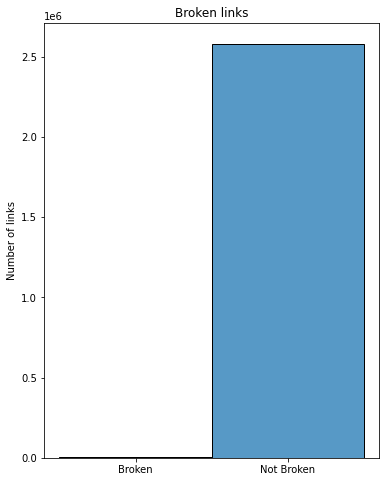

In [ ]:
#INSERT CODE HERE
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize figure size
plt.figure(figsize = ( 6 , 8))
  
# Plot histogram
fig = sns.histplot(data=df, stat='count', x='download_ready',bins=2)
fig.set(xlabel=None)
fig.set_xticks([0.25, 0.75])
fig.set(xticklabels=['Broken','Not Broken'])
#fig.tick_params(bottom=False) 
fig.set(ylabel='Number of links')
fig.set(title='Broken links')

# Display figure
plt.show()

In [ ]:
pic = fig.figure
images_dir = '/content/drive/MyDrive/38610/Project'
pic.savefig(f"{images_dir}/4b.png")

c. Pie chart. Create a pie chart using the values in `status_code` in the dataframe `manifest`. 

* Title should be `Status codes`.
* Add legends.

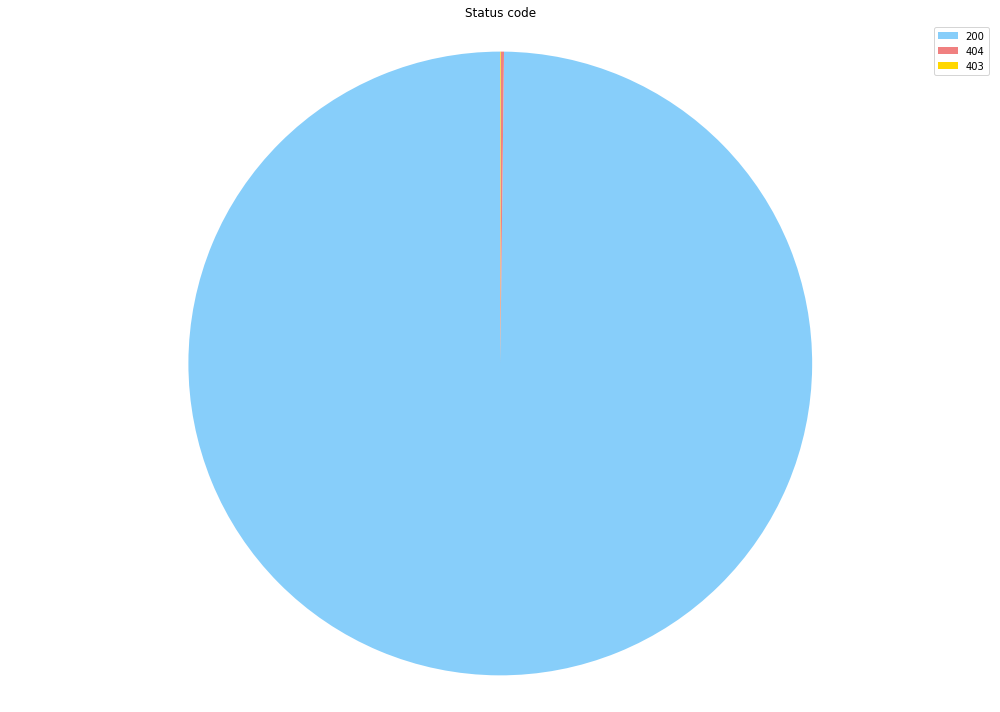

In [ ]:
#INSERT CODE HERE
# get dataset
file = 'manifest.tsv'
if Path(file).exists():
    # Set up data
    df = pd.read_csv(file, sep='\t', low_memory=False )
    status = pd.DataFrame(df['response_code'].value_counts().reset_index())
    status['index'] = status['index'].apply(lambda x: int(x))
    print(status)

    # Set colors
    colors = ['lightskyblue', 'lightcoral', 'gold']

    # Create pie chart

    plt.figure(figsize = ( 14 , 10))
    
    labels = status['index']
    sizes = status.response_code
    patches, texts = plt.pie(sizes, colors=colors, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.title('Status code')
    plt.axis('equal')
    plt.tight_layout()


    plt.show()
    plt.savefig(f"{images_dir}/4c.png")
else:
    print(file, ' does not exist!!!')

In [ ]:
import matplotlib
matplotlib.use('Agg')

plt.savefig(f"{images_dir}/4c.png")
plt.show()

d. Create a plot using the values in `file_creation_date` in dataframe manifest. However, this exercise is open-ended. 

This is my user-story and your job is to create the best plot you think will show what I want.

* The only part I care about the `file_create_date` is the date. Or months, or years, not sure.
* What I want to do is to create a plot that I can show the increment of data through the years.
* I am still debating whether I should just show how many files are available per year, or do a cumulative plot since it should be, in theory, monotonically increasing.

What do you think? Make a plot, convince me your plot is the best.

In [ ]:
def to_date(dt):
    date = str(dt)[0:10]
    return date

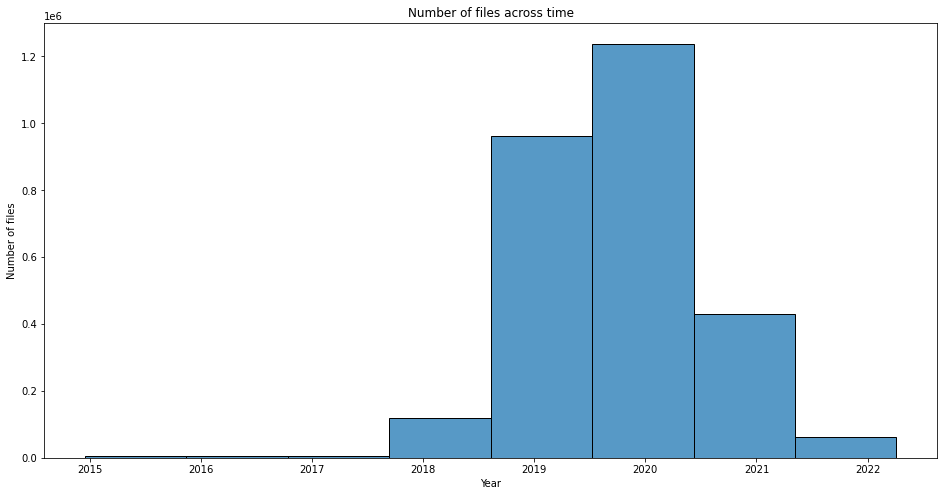

In [ ]:
#INSERT CODE HERE
file = 'manifest.tsv'
if Path(file).exists():
  # Set up data
  df = pd.read_csv(file, sep='\t', low_memory=False )
  status = pd.DataFrame(df['response_code'].value_counts().reset_index())
  df['file_creation_date_only'] = df.apply(lambda f: to_date(f.file_creation_date),axis=1)
  df['file_creation_date_only'] = pd.to_datetime(df['file_creation_date_only'],errors='coerce')  
  
  # Initialize figure size
  plt.figure(figsize = ( 16 , 8))
  
  # Plot histogram
  fig = sns.histplot(data=df, stat='count', x='file_creation_date_only',bins = 8)
  fig.set(xlabel='Year')
  # fig.set(xticklabels=set(df['file_creation_date_only']))
  #fig.tick_params(bottom=False) 
  fig.set(ylabel='Number of files')
  fig.set(title='Number of files across time')

  # Display figure
  plt.show()

  # Save figure
  pic = fig.figure
  images_dir = '/content/drive/MyDrive/38610/Project'
  pic.savefig(f"{images_dir}/4d.png")

else:
    print(file, ' does not exist!!!')